<a href="https://colab.research.google.com/github/KristineYW/DS-Unit-2-Applied-Modeling/blob/master/Kristine_Wang_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Interpretation
You will use your portfolio project dataset for all assignments this sprint.

Assignment
Complete these tasks for your project, and document your work.

 Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
 Make at least 1 partial dependence plot to explain your model.
 Make at least 1 Shapley force plot to explain an individual prediction.
 Share at least 1 visualization (of any type) on Slack!
If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that multi-class classification will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# # Read New York City property sales data
# import pandas as pd
# df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [3]:
# Change column names: replace spaces with underscores

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sc1 = pd.read_csv('https://raw.githubusercontent.com/KristineYW/DS-Unit-2-Applied-Modeling/master/SCDB_2019_01_justiceCentered_LegalProvision_1.csv', encoding = "ISO-8859-1")

sc1.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01-01-01,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01-01-02,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01-01-03,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01-01-04,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01-01-05,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sc2 = pd.read_csv('https://raw.githubusercontent.com/KristineYW/DS-Unit-2-Applied-Modeling/master/SCDB_2019_01_justiceCentered_LegalProvision_2.csv', encoding = "ISO-8859-1")

sc2.head()

,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,...,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,...,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,...,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,...,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,...,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,...,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


In [5]:
# Join the two large datasets into one dataframe

sc = pd.concat([sc1,sc2], axis=1)

sc.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,...,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,1946-001,1946-001-01,1946-001-01-01-01-01,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,1946-001,1946-001-01,1946-001-01-01-01-02,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,1946-001,1946-001-01,1946-001-01-01-01-03,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,1946-001,1946-001-01,1946-001-01-01-01-04,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,1946-001,1946-001-01,1946-001-01-01-01-05,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


In [6]:
sc = sc.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 
              'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 
              'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 
              'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 
              'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 
              'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54'], axis=1)

sc.head()

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,...,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
0,1946-001,1946-001-01,1946-001-01-01-01-01,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0
1,1946-001,1946-001-01,1946-001-01-01-01-02,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0
2,1946-001,1946-001-01,1946-001-01-01-01-03,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0
3,1946-001,1946-001-01,1946-001-01-01-01-04,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0
4,1946-001,1946-001-01,1946-001-01-01-01-05,11/18/46,1,91 L. Ed. 3,1946,1301,Vinson,24,...,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0


In [7]:
import datetime

In [9]:
sc.sample(10)

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,...,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority
114307,2011-021,2011-021-01,2011-021-01-01-01-02,1/20/12,6,181 L. Ed. 2d 900,2011,1704,Roberts,11-713,...,111.0,1,9,0,105,AScalia,1.0,1.0,1.0,2.0
6945,1949-026,1949-026-01,1949-026-01-01-01-07,1/9/50,1,94 L. Ed. 2d 245,1949,1303,Vinson,59,...,87.0,1,8,0,79,SFReed,1.0,1.0,2.0,2.0
78499,1984-108,1984-108-01,1984-108-01-01-01-04,6/3/85,1,85 L. Ed. 2d 753,1984,1507,Burger,83-2161,...,99.0,1,6,3,99,WEBurger,1.0,1.0,2.0,2.0
26514,1961-015,1961-015-01,1961-015-01-01-01-07,12/18/61,1,7 L. Ed. 2d 299,1961,1406,Warren,42,...,90.0,1,6,3,88,TCClark,1.0,1.0,2.0,2.0
56170,1974-137,1974-137-01,1974-137-01-01-01-07,6/25/75,1,45 L. Ed. 2d 272,1974,1504,Burger,74-107,...,99.0,1,8,1,100,HABlackmun,1.0,1.0,1.0,2.0
11274,1952-003,1952-003-01,1952-003-01-01-01-08,11/10/52,1,97 L. Ed. 2d 6,1952,1303,Vinson,51,...,87.0,1,6,3,78,HLBlack,1.0,2.0,2.0,2.0
106322,2003-006,2003-006-06,2003-006-06-01-01-09,12/10/03,1,157 L. Ed. 2d 491,2003,1607,Rehnquist,02-1733,...,103.0,1,5,4,110,SGBreyer,1.0,2.0,2.0,2.0
85115,1987-080,1987-080-01,1987-080-01-01-01-04,5/16/88,1,100 L. Ed. 2d 48,1987,1603,Rehnquist,87-339,...,102.0,1,9,0,100,HABlackmun,1.0,1.0,2.0,2.0
49886,1972-039,1972-039-01,1972-039-01-02-01-05,1/16/73,1,35 L. Ed. 2d 29,1972,1504,Burger,71-6272,...,99.0,1,6,3,95,BRWhite,1.0,1.0,1.0,2.0
83504,1986-131,1986-131-01,1986-131-01-01-01-05,6/19/87,1,96 L. Ed. 2d 557,1986,1601,Rehnquist,86-475,...,92.0,1,6,3,101,LFPowell,1.0,1.0,2.0,2.0


In [11]:
# Change dateDecision to datetime data type 


def yearConvert(date):
    year_int = int(date[-2:])
    if year_int > 20:
        edited_str = date[:-2] + '19' + date[-2:]
    else:
        edited_str = date[:-2] + '20' + date[-2:]
    return(pd.to_datetime(edited_str))
sc['dateDecision'] = [yearConvert(i) for i in sc['dateDecision']]
sc['dateDecision'].describe

<bound method NDFrame.describe of 0        1946-11-18
1        1946-11-18
2        1946-11-18
3        1946-11-18
4        1946-11-18
            ...    
120553   2019-05-28
120554   2019-05-28
120555   2019-05-28
120556   2019-05-28
120557   2019-05-28
Name: dateDecision, Length: 120558, dtype: datetime64[ns]>

In [12]:
# Introduce new features for senate majority party and presidential party


sc['partyOfPresident'] = np.where((sc['dateDecision'] < '1953-01-19') | ('1961-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '1969-01-19') | 
                                  ('1977-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '1981-01-19') | 
                                  ('1993-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '2001-01-19') | 
                                  ('2009-01-20' < sc['dateDecision']) & (sc['dateDecision'] < '2017-01-20'), 
                                  'Democrat','Republican')

In [13]:
sc['partyOfAppointing'] = np.where((sc['justiceName'] == 'BRWhite') | (sc['justiceName'] == 'WODouglas') | (sc['justiceName'] == 'Tmarshall') | 
                                (sc['justiceName'] == 'HLBlack') | (sc['justiceName'] == 'TCClark') | (sc['justiceName'] == 'Ffrankfurter') | 
                                (sc['justiceName']== 'RBGinsburg') | (sc['justiceName'] == 'SGBreyer') | (sc['justiceName'] == 'HHBurton') | 
                                (sc['justiceName'] == 'SFReed') | (sc['justiceName'] == 'RHJackson') | (sc['justiceName'] == 'FMVinson') | 
                                (sc['justiceName'] == 'Sminton') | (sc['justiceName'] == 'Ssotomayor') | (sc['justiceName'] == 'Afortas') | 
                                (sc['justiceName'] == 'Ekagan') | (sc['justiceName'] == 'Fmurphy') | (sc['justiceName'] == 'WBRutledge') | 
                                (sc['justiceName'] == 'AJGoldberg'), 'Democrat','Republican' )

In [16]:
sc['partyOfSenate'] = np.where((sc['dateDecision'] < '1947-01-03') | ('1949-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '1953-01-02') | 
                                  ('1955-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '1981-01-02') | 
                                  ('1987-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '1995-01-02') |
                                  ('2001-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '2002-11-11') | 
                                  ('2007-01-03' < sc['dateDecision']) & (sc['dateDecision'] < '2017-01-02'),
                                  'Democrat','Republican')

sc['partyOfSenate'].value_counts(normalize=True)

Democrat      0.712404
Republican    0.287596
Name: partyOfSenate, dtype: float64

In [18]:
pd.set_option('display.max_columns',100)
    
sc.head(10)

,caseId,docketId,voteId,dateDecision,decisionType,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,firstAgreement,secondAgreement,ï»¿certReason,lcDisposition,lcDispositionDirection,declarationUncon,caseDisposition,caseDispositionUnusual,partyWinning,precedentAlteration,voteUnclear,issue,issueArea,decisionDirection,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,partyOfPresident,partyOfAppointing,partyOfSenate
0,1946-001,1946-001-01,1946-001-01-01-01-01,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,86,HHBurton,2.0,1.0,1.0,1.0,Democrat,Democrat,Democrat
1,1946-001,1946-001-01,1946-001-01-01-01-02,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,84,RHJackson,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
2,1946-001,1946-001-01,1946-001-01-01-01-03,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,81,WODouglas,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
3,1946-001,1946-001-01,1946-001-01-01-01-04,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,Democrat,Republican,Democrat
4,1946-001,1946-001-01,1946-001-01-01-01-05,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,79,SFReed,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
5,1946-001,1946-001-01,1946-001-01-01-01-06,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,78,HLBlack,1.0,2.0,2.0,2.0,Democrat,Democrat,Democrat
6,1946-001,1946-001-01,1946-001-01-01-01-07,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,85,WBRutledge,1.0,1.0,2.0,2.0,Democrat,Democrat,Democrat
7,1946-001,1946-001-01,1946-001-01-01-01-08,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN,NaN,0.0,51.0,6.0,29.0,NaN,0.0,NaN,NaN,11.0,2.0,1.0,1.0,3.0,0.0,1.0,1.0,0.0,80180.0,8.0,2.0,0.0,4.0,NaN,6.0,600.0,35 U.S.C. Ã 33,78.0,78.0,1,8,1,82,FMurphy,1.0,1.0,2.0,2.0,Democrat,Republican,Democrat
8,1946-001,1946-001-01,1946-001-01-01-01-09,1946-11-18,1,91 L. Ed. 3,1946,1301,Vinson,24,HALLIBURTON OIL WELL CEMENTING CO. v. WALKER e...,1/9/46,10/23/46,198.0,NaN,172.0,NaN,6,NaN

In [19]:
sc['term'].value_counts()

1967    2943
1986    2583
1946    2556
1975    2496
1973    2448
        ... 
2017     801
2007     790
2014     783
2016     747
2018     720
Name: term, Length: 73, dtype: int64

In [20]:
# Retrain features to be categorical for OneHotEncoding

all_columns = list(sc)
sc[all_columns] = sc[all_columns].astype(str)

In [21]:
sc['direction'].value_counts(normalize=True)

2.0    0.496666
1.0    0.447419
nan    0.055915
Name: direction, dtype: float64

In [22]:
sc['direction'] = sc['direction'].replace({'nan':'-1'})

In [23]:
sc['direction'].value_counts(normalize=True)

2.0    0.496666
1.0    0.447419
-1     0.055915
Name: direction, dtype: float64

In [24]:
sc['partyOfPresident'].value_counts(normalize=True)

Republican    0.551909
Democrat      0.448091
Name: partyOfPresident, dtype: float64

In [25]:
sc['partyOfSenate'].value_counts(normalize=True)

Democrat      0.712404
Republican    0.287596
Name: partyOfSenate, dtype: float64

In [27]:
sc = sc.fillna(0)

In [28]:
# Drop all outcome variables

sc = sc.drop(['decisionDirection', 'partyWinning','majVotes','minVotes','majority','decisionType','declarationUncon',
              'caseDispositionUnusual','precedentAlteration','voteUnclear','majOpinWriter','majOpinAssigner',
              'splitVote','vote','opinion','majority','firstAgreement','secondAgreement'], axis=1)

In [30]:
# Split the dataframe into train and test sets 

from sklearn.model_selection import train_test_split

train, test = train_test_split(sc, train_size=0.9, test_size=0.10, 
                              stratify=sc['direction'], random_state=42)

In [31]:
train, val = train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['direction'], random_state=42)

In [32]:
train.shape, val.shape, test.shape

((92226, 43), (16276, 43), (12056, 43))

In [36]:
target= 'direction'
features = sc.columns.drop('direction')

In [37]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [39]:
# import category_encoders as ce
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from xgboost import XGBClassifier

# processor = make_pipeline(
#     ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='median')
# )

# X_train_processed = processor.fit_transform(X_train)
# X_val_processed = processor.transform(X_val)

# eval_set = [(X_train_processed, y_train), 
#             (X_val_processed, y_val)]

In [72]:
model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, 
          early_stopping_rounds=10)

[0]	validation_0-merror:0.290157	validation_1-merror:0.287909
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.288628	validation_1-merror:0.286127
[2]	validation_0-merror:0.289365	validation_1-merror:0.286864
[3]	validation_0-merror:0.288834	validation_1-merror:0.286373
[4]	validation_0-merror:0.289506	validation_1-merror:0.287048
[5]	validation_0-merror:0.288487	validation_1-merror:0.286434
[6]	validation_0-merror:0.288552	validation_1-merror:0.286557
[7]	validation_0-merror:0.288617	validation_1-merror:0.286373
[8]	validation_0-merror:0.286644	validation_1-merror:0.284652
[9]	validation_0-merror:0.2866	validation_1-merror:0.284652
[10]	validation_0-merror:0.285939	validation_1-merror:0.283731
[11]	validation_0-merror:0.282025	validation_1-merror:0.281457
[12]	validation_0-merror:0.2866	validation_1-merror:0.28539
[13]	validation_0-merror:0.282144

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
# row = X_test.iloc[[900]]
# row

,caseId,docketId,voteId,dateDecision,ledCite,term,naturalCourt,chief,docket,caseName,dateArgument,dateRearg,petitioner,petitionerState,respondent,respondentState,jurisdiction,adminAction,adminActionState,threeJudgeFdc,caseOrigin,caseOriginState,caseSource,caseSourceState,lcDisagreement,ï»¿certReason,lcDisposition,lcDispositionDirection,caseDisposition,issue,issueArea,decisionDirectionDissent,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,justice,justiceName,partyOfPresident,partyOfAppointing,partyOfSenate
112685,2009-056,2009-056-01,2009-056-01-01-01-09,2010-05-24,176 L. Ed. 2d 1012,2009,1703,Roberts,08-1341,UNITED STATES v. GLENN MARCUS,2/24/10,nan,27.0,nan,126.0,nan,1,nan,nan,0.0,94.0,nan,22.0,nan,0.0,11.0,5.0,2.0,4.0,10370.0,1.0,0.0,4.0,7.0,4.0,401.0,nan,113,SSotomayor,Democrat,Republican,Democrat


In [73]:
# STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE
import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value[0], 
    shap_values = shap_values[0], 
    link='logit' # For classification, this shows predicted probabilities
)

In [67]:
import category_encoders as ce
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_encoded, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

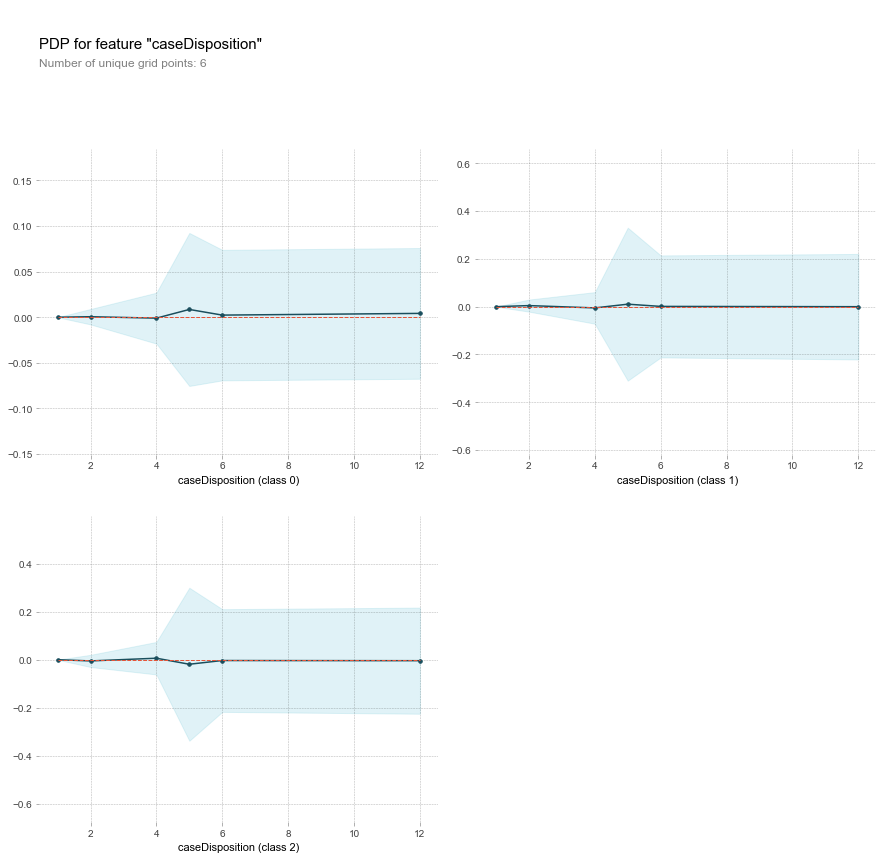

In [68]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'caseDisposition'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

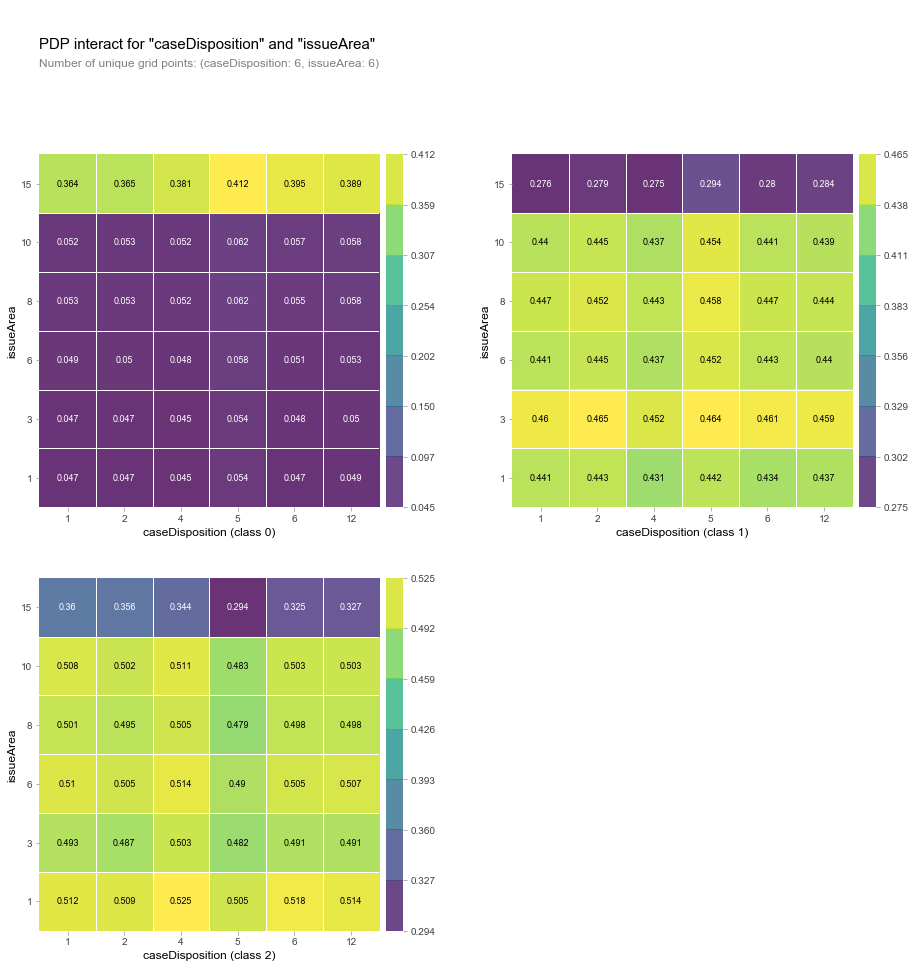

In [70]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['caseDisposition', 'issueArea']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);